DATAFRAME КАК СТРУКТУРА ДАННЫХ

✍ Наиболее популярным и понятным является табличное представление данных. Для работы с такими данными в Pandas существует объект DataFrame.

DataFrame является двумерной структурой и представляется в виде таблицы, в которой есть строки и столбцы: столбцами в DataFrame выступают объекты Series, а строки формируются из их элементов. Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.

Приведём пример такой структуры:

ФИО	ВОЗРАСТ	ДОХОД	РАЗМЕР КРЕДИТА

0	Иванов И. И.	32	120	250
1	Авербух А. В.	28	44	320
2	Вестяк А. В.	86	250	500

Примечание. В дальнейшем слова DataFrame и таблица будут употребляться как синонимы. Также синонимами в Data Science являются слова столбец таблицы и признак.

СОЗДАНИЕ DATAFRAME

DataFrame создаётся с помощью функции pd.DataFrame(). Так же, как и для Series, для создания объектов DataFrame есть несколько способов:

СПОСОБ 1

Самый простой способ создания DataFrame — из словаря, ключами которого являются имена столбцов будущей таблицы, а значениями — списки, в которых хранится содержимое этих столбцов:



In [ ]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'area': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
Img



Открыть примечание
Обратите внимание, что, так как мы не задали метки (индексы) DataFrame, они были сгенерированы автоматически. Исправим это, задав индексы вручную:

countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)
Img

СПОСОБ 2

Также DataFrame можно создать из вложенного списка, внутренние списки которого будут являться строками новой таблицы:



In [ ]:
countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'area'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)
display(countries_df)
Img



В данном варианте создания DataFrame мы задаём имена столбцов в списке с помощью параметра columns, а также инициализируем параметр index для задания меток стран.

AXIS В DATAFRAME

→ Как уже было сказано, DataFrame является двумерной структурой данных, что означает наличие двух возможных направлений движения в ней: вдоль строк и вдоль столбцов. 

Например, мы можем удалять как строки, так и столбцы таблицы, вычислять среднее значение как по столбцам, так и по строкам таблицы.

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по строкам в таблице обозначается axis с индексом 0, а движение по столбцам — axis с индексом 1.

Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.

Схема ниже демонстрирует направления axis в DataFrame:

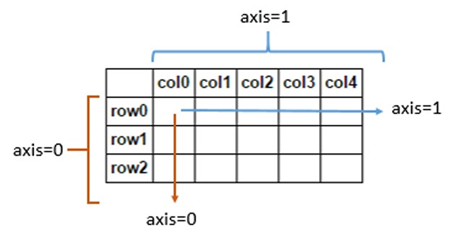


Рассмотрим разницу в результатах работы методов в зависимости от параметра axis на примере использования метода DataFrame mean() — вычисление среднего по таблице.

Считаем среднее по строкам (axis = 0) в каждом столбце:



In [ ]:
countries_df.mean(axis=0, numeric_only=True)


![axis = 0.png](<attachment:axis = 0.png>)

В данном случае среднее было рассчитано по строкам для столбцов population и area.

Обратите внимание на то, что так как не все столбцы в нашей таблице являются числовыми, то нам необходимо установить параметр numeric_only в значение True (вести расчёт только по числовым столбцам). Это делается для того, чтобы не получать предупреждений (warnings).

Считаем среднее по столбцам (axis = 1) в каждой строке:


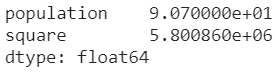

In [ ]:
countries_df.mean(axis=1, numeric_only=True)


![axis = 1.png](<attachment:axis = 1.png>)

Здесь среднее было рассчитано по числовым столбцам для каждой строки в таблице.

ДОСТУП К ДАННЫМ В DATAFRAME

Доступ к столбцу можно получить разными способами:

Можно обратиться к DataFrame по имени столбца через точку:


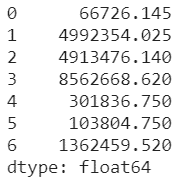

In [ ]:
countries_df.population


![обратиться к DataFrame.png](<attachment:обратиться к DataFrame.png>)

Однако использование такого способа возможно только тогда, когда имя столбца указано без пробелов.

Другой вариант — обратиться к DataFrame по индексу и указать имя столбца:


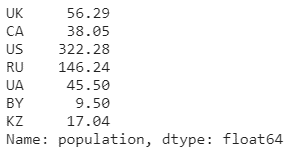

In [ ]:
countries_df['population']


![по индексу.png](<attachment:по индексу.png>)

Примечание. Обратите внимание, что, как и ожидалось, при обращении к столбцу DataFrame мы получаем объект Series с именем, соответствующим имени столбца. Удостовериться в этом можно с помощью функции type():


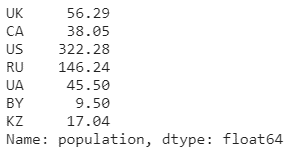

In [ ]:
type(countries_df.population)
# pandas.core.series.Series


Для того чтобы получить доступ к ячейкам таблицы, используются уже знакомые нам loc и iloc.

При этом, в соответствии с механизмом работы axis, при обращении к DataFrame по индексам с помощью loc (iloc) первым индексом указывается индекс (порядковый номер), соответствующий строкам, а вторым — имя (порядковый номер) столбца.

Рассмотрим на примерах:

1
Получим площадь Великобритании:



In [ ]:
countries_df.loc['UK', 'area']


2
Получим население и площадь, соответствующие России:

In [ ]:
countries_df.loc['RU', ['population', 'area']]

3
Сделаем вырезку из таблицы и получим информацию о населении и площади, соответствующую Украине, Беларуси и Казахстану:


In [ ]:
countries_df.loc[['UA', 'BY', 'KZ'],['population', 'area']]


или


In [ ]:
countries_df.iloc[4:8, 1:3]


✍ Для нас DataFrame является главной структурой данных в Pandas, с которой мы будем работать на протяжении всех модулей, посвящённых этой библиотеке.

Далее мы рассмотрим ещё несколько способов создания этой структуры из различных источников, а пока предлагаем вам закрепить знания, выполнив несколько заданий ↓



*Задание 3.5*

Вы работаете аналитиком в компании ScienceYou. Ваша задача — проанализировать чистую прибыль.

Доходы (income), расходы (expenses) и годы (years), соответствующие им, предоставлены вам в виде списков.

Например:


In [ ]:
income = [478, 512, 196]
expenses = [156, 130, 270]
years = [2018, 2019, 2020]

Создайте функцию create_companyDF(income, expenses, years), которая возвращает DataFrame, составленный из входных данных со столбцами Income и Expenses и индексами, соответствующими годам рассматриваемого периода.

Пример такого DataFrame представлен ниже.


    Income  Expenses
2018    478     156
2019    512     130
2020    196     270
Также напишите функцию get_profit(df, year), которая возвращает разницу между доходом и расходом, записанными в таблице df, за год year.

Примечание. Если информация за запрашиваемый год не указана в вашей таблице, вам необходимо вернуть None.

Примечание. Не забудьте ипортировать библиотеки.

In [2]:
import pandas as pd

In [4]:
import numpy as np

In [5]:

def create_companyDF(income, expenses, years):
    df = pd.DataFrame({
        'Income': income,
        'Expenses': expenses
        },
        index = years
    )
    return df
def get_profit(df, year):
    if year in df.index:
        profit = df.loc[year, 'Income'] - df.loc[year, 'Expenses']
    else:
        profit=None
    return profit